In [1]:
import pandas as pd
import numpy as np
import pymssql  
import requests as re
import json
import geopandas as gpd
from shapely import geometry
from matplotlib import pyplot as plt
import os

In [2]:
ca=pd.read_csv('results of station classification in BRTN.csv',encoding='gbk')

In [4]:
# 北京面域
beij=gpd.read_file('shapefile\\beij_fq.shp',encoding='utf-8')

In [5]:
# 公交站点
df3=pd.read_csv('data\bus_station.csv',encoding='gbk')
df3=df3.drop(columns='Unnamed: 0')
def split_x22(x):
    return x+'_b'
df3['station']=df3['station'].apply(lambda x:split_x22(x))

# 地铁站点
df4=pd.read_csv('data\metro_station.csv',encoding='gbk')
df4=df4.drop(columns='Unnamed: 0')
def split_x32(x):
    return x+'_m'
df4['station']=df4['station'].apply(lambda x:split_x32(x))

df5=pd.concat([df3,df4])
print(df5.shape)
gemmbs = gpd.GeoDataFrame(df5[['station','lng','lat']],geometry=gpd.points_from_xy(df5['lng'],df5['lat']),crs='epsg:4326')
gemmbs['class']=gemmbs['station'].apply(lambda x:x[-1])
gemmbs.head(2)

(7466, 4)


,station,lng,lat,geometry,class
0,霍营北口_b,116.36554,40.08844,POINT (116.36554 40.08844),b
1,新苑街_b,116.32855,39.93540,POINT (116.32855 39.93540),b


In [6]:
# 读取线文件


In [7]:
bs_line=gpd.read_file('shapefile\\bus_line.shp',encoding='utf-8')
ms_line=gpd.read_file('shapefile\\subway_line.shp',encoding='utf-8')


In [8]:
cab=ca[ca['station class']=='bus']
cam=ca[ca['station class']=='metro']

In [9]:
cam.shape,cab.shape

((282, 4), (7184, 4))

In [10]:
bus_p=gemmbs[gemmbs['class']=='b']

In [11]:
bus_p2=bus_p.merge(cab[['station','clable']],on='station',how='inner')
bus_p2.shape

(7184, 6)

In [12]:
bus_p2.head(2)

,station,lng,lat,geometry,class,clable
0,霍营北口_b,116.36554,40.08844,POINT (116.36554 40.08844),b,0
1,新苑街_b,116.32855,39.93540,POINT (116.32855 39.93540),b,0


In [13]:
m_p=gemmbs[gemmbs['class']=='m']
m_p2=m_p.merge(cam[['station','clable']],on='station',how='inner')
m_p2.head(2)

,station,lng,lat,geometry,class,clable
0,魏公村_m,116.329874,39.963457,POINT (116.32987 39.96346),m,1
1,西红门_m,116.335169,39.795445,POINT (116.33517 39.79545),m,1


In [14]:
df=gpd.sjoin(
    beij,m_p2,
    how='inner',
    op='intersects')

C:\ProgramData\Anaconda3\envs\py39\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\111\AppData\Local\Temp\ipykernel_22152\1309524746.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...
Right CRS: EPSG:4326

  df=gpd.sjoin(


In [15]:
list(beij.columns)

['市', '县', '县类型', 'geometry']

In [16]:
mdf=df[['市', '县', '县类型', 'geometry']].drop_duplicates()

In [18]:
from shapely.geometry import Polygon
from geopandas import GeoSeries
p3 = Polygon([(116.300215, 39.820764),(116.332359, 39.820764), (116.332359, 39.948864), (116.300215, 39.948864)])
g = GeoSeries(p3)
dfg=gpd.GeoDataFrame(geometry=g,crs='epsg:4326')

C:\ProgramData\Anaconda3\envs\py39\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\111\AppData\Local\Temp\ipykernel_22152\3900808302.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...
Right CRS: EPSG:4326

  dfff=gpd.sjoin(


<AxesSubplot:>

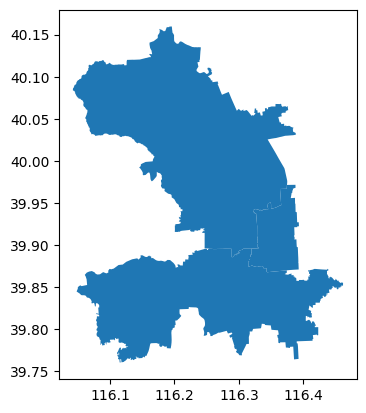

In [19]:
dfff=gpd.sjoin(
    beij,dfg,
    how='inner',
    op='intersects')
dfff.plot()

# 1 绘图

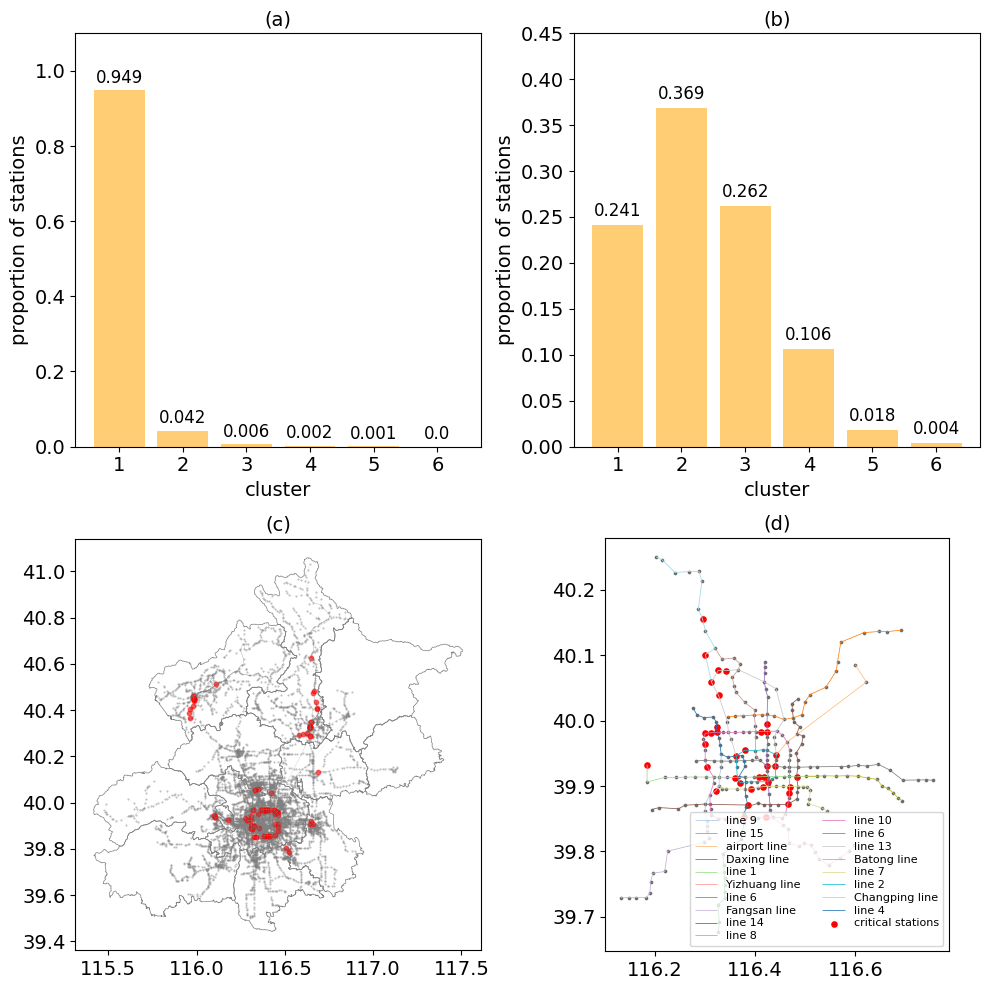

In [34]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
# 公交
leg=['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6']
leg=['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6']


# 【1】 统计数据--公交
df1=cab.groupby('clable').count().reset_index()
df1.loc[5]=[5,0,0,0]
df1['pb']=np.round(df1['station']/sum(df1['station']),3)
ax[0][0].bar(df1['clable'],df1['pb'],color='orange',alpha=0.55)

ax[0][0].set_ylim(0,1.1)
ax[0][0].set_title('(a)',fontsize=14)
ax[0][0].set_ylabel('proportion of stations', fontsize=14) 
ax[0][0].set_xlabel('cluster', fontsize=14)

ax[0][0].set_xticks([0,1,2,3,4,5])
ax[0][0].set_xticklabels(labels =[1,2,3,4,5,6], rotation =0,fontsize = 14)

# 统计地铁
df2=cam.groupby('clable').count().reset_index()
df2['pb']=np.round(df2['station']/sum(df2['station']),3)
ax[0][1].bar(df2['clable'],df2['pb'],color='orange',alpha=0.55)

ax[0][1].set_ylabel('proportion of stations', fontsize=14) 
ax[0][1].set_xticks([0,1,2,3,4,5])
ax[0][1].set_xticklabels(labels =[1,2,3,4,5,6], rotation =0,fontsize = 14)
ax[0][1].set_xlabel('cluster', fontsize=14)
ax[0][1].set_ylim(0,0.45)
ax[0][1].set_title('(b)',fontsize=14)
for i in range(df1.shape[0]):
    ax[0][0].text(i,list(df1['pb'])[i]+0.02,round(list(df1['pb'])[i],3),
                  color="black",ha="center",fontsize=12)
    ax[0][1].text(i,list(df2['pb'])[i]+0.01,round(list(df2['pb'])[i],3),
                  color="black",ha="center",fontsize=12)
ax[0][0].tick_params(labelsize=14)
ax[0][1].tick_params(labelsize=14)
# 【2】 可视化
# 公交
bs_line.plot(ax=ax[1][0],linewidth=0.1,color='gray',alpha=0.3)
beij.plot(ax=ax[1][0],facecolor='none',edgecolor='gray',linewidth=0.5)
bus_p2.plot(ax=ax[1][0],markersize=.3,color='gray',alpha=0.45)
bus_p2[bus_p2['clable']==4].plot(ax=ax[1][0],color='red',markersize=14,alpha=1)
bus_p2[bus_p2['clable']==3].plot(ax=ax[1][0],color='red',markersize=12,alpha=0.75)
bus_p2[bus_p2['clable']==2].plot(ax=ax[1][0],color='red',markersize=10,alpha=0.55)

ax[1][0].set_title('(c)',fontsize=14)
ax[1][0].tick_params(labelsize=14)

# 地铁2
# dfff.plot(ax=ax[1][1],facecolor='none',edgecolor='gray',linewidth=0.5)
# ms_line.plot(ax=ax[1][1],linewidth=1,color='gray')

line_shp=ms_line
mmbslblen=line_shp.shape[0]
leg=['line 9','line 15','airport line','Daxing line','line 1','Yizhuang line','line 6','Fangsan line',
     'line 14','line 8','line 10','line 6','line 13','Batong line','line 7','line 2','Changping line','line 4']
mbmap_vir = plt.cm.get_cmap(name='tab20')
mbcolor =mbmap_vir(list(np.linspace(0,1,len(leg))))
for j in range(1,len(leg)):
    line_shp[j-1:j].plot(ax=ax[1][1],legend=True,label=leg[j-1],color=mbcolor[j],linewidth=.55)
line_shp[j:j+1].plot(ax=ax[1][1],legend=True,label=leg[j],color=mbcolor[0],linewidth=.55)



gemmbs[gemmbs['class']=='m'].plot(ax=ax[1][1],markersize=3,color='k',alpha=0.45)

m_p2[m_p2['clable']==5].plot(ax=ax[1][1],color='red',markersize=14,alpha=1,label='critical stations',legend=True)
m_p2[m_p2['clable']==4].plot(ax=ax[1][1],color='red',markersize=14,alpha=1)
m_p2[m_p2['clable']==3].plot(ax=ax[1][1],color='red',markersize=14,alpha=1)
ax[1][1].legend(ncol=2,labelspacing=0.25,fontsize=8,loc=4,)


ax[1][1].set_title('(d)',fontsize=14)
ax[1][1].tick_params(labelsize=14)

fig.tight_layout()


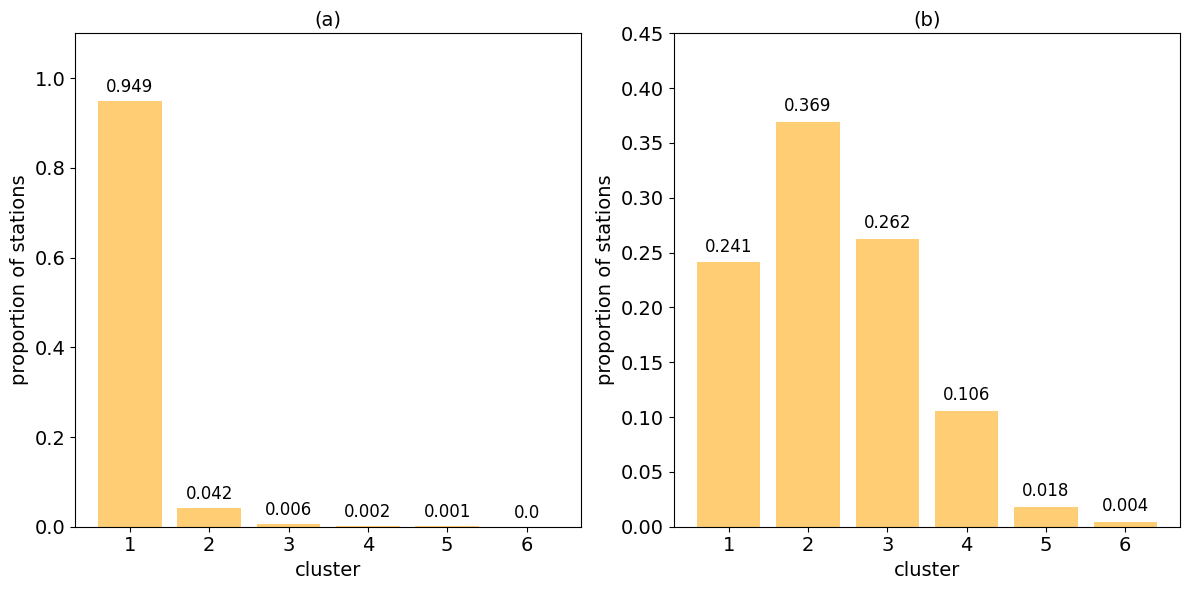

In [116]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
# 公交
leg=['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6']
leg=['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6']


# 【1】 统计数据--公交
df1=cab.groupby('clable').count().reset_index()
df1.loc[5]=[5,0,0,0]
df1['pb']=np.round(df1['station']/sum(df1['station']),3)
ax[0].bar(df1['clable'],df1['pb'],color='orange',alpha=0.55)

ax[0].set_ylim(0,1.1)
ax[0].set_title('(a)',fontsize=14)
ax[0].set_ylabel('proportion of stations', fontsize=14) 
ax[0].set_xlabel('cluster', fontsize=14)

ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xticklabels(labels =[1,2,3,4,5,6], rotation =0,fontsize = 14)

# 统计地铁
df2=cam.groupby('clable').count().reset_index()
df2['pb']=np.round(df2['station']/sum(df2['station']),3)
ax[1].bar(df2['clable'],df2['pb'],color='orange',alpha=0.55)

ax[1].set_ylabel('proportion of stations', fontsize=14) 
ax[1].set_xticks([0,1,2,3,4,5])
ax[1].set_xticklabels(labels =[1,2,3,4,5,6], rotation =0,fontsize = 14)
ax[1].set_xlabel('cluster', fontsize=14)
ax[1].set_ylim(0,0.45)
ax[1].set_title('(b)',fontsize=14)
for i in range(df1.shape[0]):
    ax[0].text(i,list(df1['pb'])[i]+0.02,round(list(df1['pb'])[i],3),
                  color="black",ha="center",fontsize=12)
    ax[1].text(i,list(df2['pb'])[i]+0.01,round(list(df2['pb'])[i],3),
                  color="black",ha="center",fontsize=12)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
fig.tight_layout()
fig.savefig(r'ig_5_ab.png', dpi=1200)

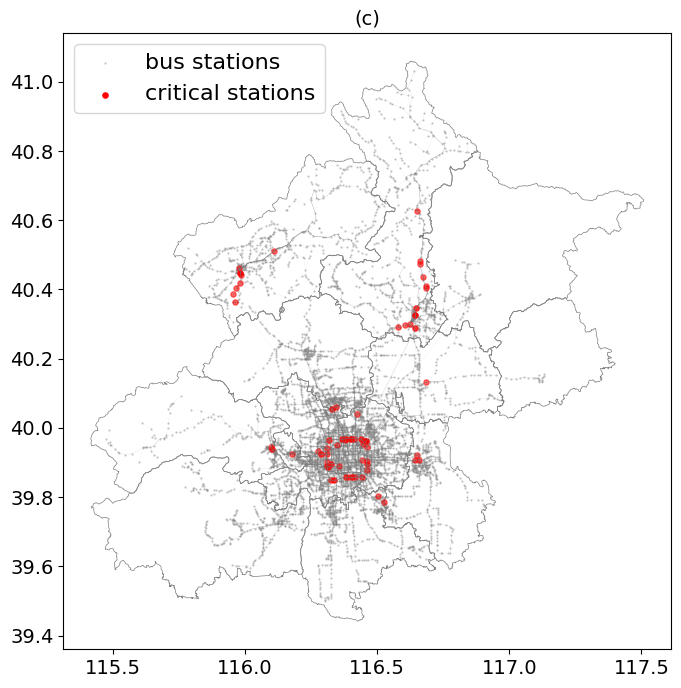

In [122]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
# 【2】 可视化
# 公交
bs_line.plot(ax=ax,linewidth=0.1,color='gray',alpha=0.3)
beij.plot(ax=ax,facecolor='none',edgecolor='gray',linewidth=0.5)
bus_p2.plot(ax=ax,markersize=.3,color='gray',alpha=0.45,label='bus stations',legend=True)
bus_p2[bus_p2['clable']==4].plot(ax=ax,color='red',markersize=14,alpha=1,label='critical stations',legend=True)
bus_p2[bus_p2['clable']==3].plot(ax=ax,color='red',markersize=14,alpha=0.75)
bus_p2[bus_p2['clable']==2].plot(ax=ax,color='red',markersize=14,alpha=0.55)
ax.set_title('(c)',fontsize=14)
ax.tick_params(labelsize=14)

ax.tick_params(labelsize=14)
ax.legend(fontsize=16)
fig.savefig(r'tu\fig_5_c.png', dpi=1200)

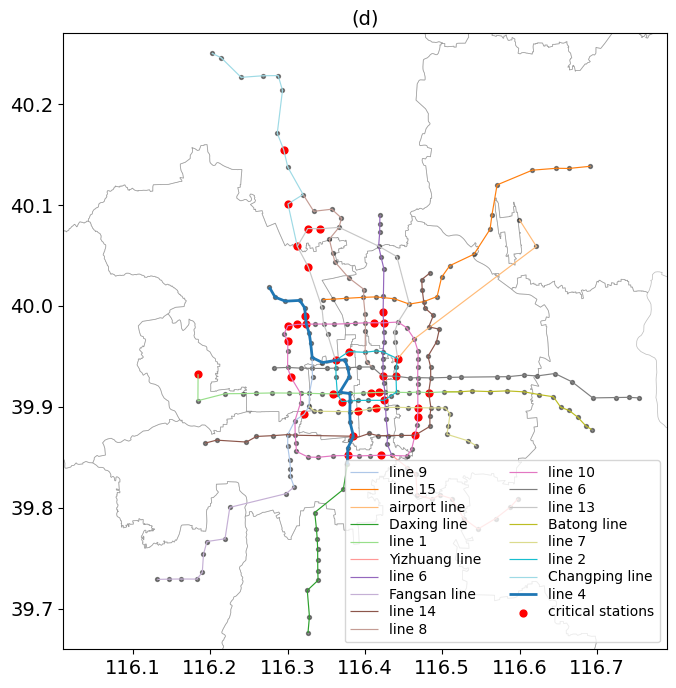

In [108]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
line_shp=ms_line
mmbslblen=line_shp.shape[0]
leg=['line 9','line 15','airport line','Daxing line','line 1','Yizhuang line','line 6','Fangsan line',
     'line 14','line 8','line 10','line 6','line 13','Batong line','line 7','line 2','Changping line','line 4']
mbmap_vir = plt.cm.get_cmap(name='tab20')
mbcolor =mbmap_vir(list(np.linspace(0,1,len(leg))))
for j in range(1,len(leg)):
    line_shp[j-1:j].plot(ax=ax,legend=True,label=leg[j-1],color=mbcolor[j],linewidth=.85)
line_shp[j:j+1].plot(ax=ax,legend=True,label=leg[j],color=mbcolor[0],linewidth=2)
beij.plot(ax=ax,facecolor='none',edgecolor='gray',linewidth=0.55,alpha=0.5)


gemmbs[gemmbs['class']=='m'].plot(ax=ax,markersize=8,color='k',alpha=0.45)

m_p2[m_p2['clable']==5].plot(ax=ax,color='red',markersize=24,alpha=1,label='critical stations',legend=True)
m_p2[m_p2['clable']==4].plot(ax=ax,color='red',markersize=24,alpha=1)
m_p2[m_p2['clable']==3].plot(ax=ax,color='red',markersize=24,alpha=1)
ax.legend(ncol=2,labelspacing=0.25,fontsize=10,loc=4)

ax.set_xlim(116.01,116.790)
ax.set_ylim(39.66,40.27)
ax.set_title('(d)',fontsize=14)
ax.tick_params(labelsize=14)
fig.savefig(r'fig_5_d.png', dpi=1200)